In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Разминка (4 балла)

## 1.1 Создание матриц (0.25 балла)

Создайте 4 матрицы
- A - "шахматную" из нулей и единиц, размера 6 на 3, левое верхнее значение (A[0][0]) равно 1,
- В - из чисел от 1 до 24, записанных в виде змейки, размера 6 на 4,
- C - из случайных целых чисел от 2 до 10 (обе границы включительно), размера 4 на 3
- D - из нулей с единичками на главной диагонали, размера 4 на 4.

**Создайте из этих матриц "лоскутную" матрицу S**

A В

С D

используя **только стандартные** операции numpy. Comprehensions использовать нельзя.

После этого допишите к полученной матрице S матрицу F размера 10 на 2 из нулей, чтобы получилась матрица G:

S F

P.S. Когда мы говорим, что матрица имеет размер x на y, x - количество строк, y - количество столбцов.

In [31]:
A = np.zeros((6, 3), dtype = int)
A[0::2, 0::2] = 1
A[1::2, 1::2] = 1
A[0, 0] = 1 # TODO

B = np.arange(1,25).reshape((6, 4)) # TODO

C = np.random.uniform(2, 11, (4, 3))# TODO

D = np.zeros((4, 4), dtype = int); np.fill_diagonal(D, 1)# TODO

S = np.block([[A, B],[C, D]])# TODO

F = np.zeros((10, 2), dtype = int)# TODO

G = np.block([[S, F]])# TODO

# YOUR CODE HERE

[[ 1.          0.          1.          1.          2.          3.
   4.          0.          0.        ]
 [ 0.          1.          0.          5.          6.          7.
   8.          0.          0.        ]
 [ 1.          0.          1.          9.         10.         11.
  12.          0.          0.        ]
 [ 0.          1.          0.         13.         14.         15.
  16.          0.          0.        ]
 [ 1.          0.          1.         17.         18.         19.
  20.          0.          0.        ]
 [ 0.          1.          0.         21.         22.         23.
  24.          0.          0.        ]
 [10.68550091  9.50898951  3.12781325  1.          0.          0.
   0.          0.          0.        ]
 [ 5.00566877  5.48264837  5.27660568  0.          1.          0.
   0.          0.          0.        ]
 [ 9.47341549  7.67842076  4.04345649  0.          0.          1.
   0.          0.          0.        ]
 [ 6.43623664  6.36886632  3.5423121   0.          0.  

## 1.2 Поиск ближайшего соседа (0.25 балла)

Реализуйте функцию, принимающую на вход матрицу X и некоторое число a и возвращающую ближайший к числу элемент матрицы.
Например, для X = np.arange(0,10).reshape((2, 5)) и a = 3.6 ответом будет 4. Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

In [32]:
def find_nearest_neighbour(X, a):
    differences = np.abs(X - a)
    index = np.argmin(differences)
    return X.flat[index]

## 1.3 Очень странная нейросеть (0.25 балла)

Реализуйте одну очень странную нейросеть. Нейросеть должна:

- Возводить матрицу A (матрицу весов) размера N x N в квадрат
- В качестве первого преобразования умножать вектор X длины N (вектор признаков) на матрицу весов A**2 (на выходе получается новый вектор);
- В качестве второго преобразования умножать вектор, полученный на прошлом шаге, на вектор b (вектор весов) размера N (на выходе получается скалярное число).

Считаем, что все числа (элементы матриц и векторов) - числа с плавающей точкой.

In [ ]:
# Придумайте свои данные для примера, N >= 4
A = # TODO
b = # TODO
X = # TODO

def very_strange_neural_network(A, b, X):
    A = A @ A

    pass # TODO


print(very_strange_neural_network(A, b, X))

## 1.4 Джунгли зовут! (0.25 балла)

Перед вами матрица M - карта местности тяжелопроходимых джунглей, составленная Ларой Крофт. На карте каждая ячейка - целое число, обозначающее высоту над уровнем моря (если число больше нуля) в метрах или глубину моря (если число меньше нуля) в метрах в данной ячейке карты размером метр на метр. Если число 0, то это часть суши - берег.


Вам необходимо посчитать:
- Общую площадь клеточек моря, в которых его глубина больше 5 (в м^2)
- Общий объём всей воды на карте (в м^3)
- Максимальную высоту над уровнем моря, которая есть на этой карте (в м)

In [4]:
def find_deep_sea_area(M):
    true_cell = M < -5
    return np.sum(true_cell)

def find_water_volume(M):
    A = np.copy(M)
    return np.sum(np.where(A < 0, -A, 0))

def find_max_height(M):
    return np.max(M)

In [5]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

assert np.isclose(find_deep_sea_area(M), 1)
assert np.isclose(find_water_volume(M), 21)
assert np.isclose(find_max_height(M), 25)

print("Общая площадь моря на карте -", find_deep_sea_area(M), "м^2")
print("Общий объем воды на карте -", find_water_volume(M), "м^3")
print("Максимальный уровень над уровнем моря на карте -", find_max_height(M), "м")

Общая площадь моря на карте - 1 м^2
Общий объем воды на карте - 21 м^3
Максимальный уровень над уровнем моря на карте - 25 м


## 1.5 Острова сокровищ (0.25 балла)


На вход функции подаётся массив a из нулей и единиц. Необходимо посчитать, сколько в массиве есть блоков из идущих подряд единиц (островков). Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.diff`

In [6]:
def count_all_islands(a):
    changes = np.diff(a)
    islands = np.sum(changes == 1)
    if a[0] == 1:
        islands += 1
    return islands

In [7]:

a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

assert count_all_islands(a) == 4
print(count_all_islands(a))

4


## 1.6 Маскарад (0.25 балла)

На вход идёт 2-мерная матрица X, заполненная числами с плавающей точкой, и дробное число a. Нужно заменить все ячейки в матрице, которые больше, чем а, на среднее значение среди элементов матрицы Х.

**Нужно** пользоваться базовыми функциями numpy, **нельзя** пользоваться циклами.

In [18]:
def swap_mask_for_average(X, a):
    average = np.mean(X)
    swapped_array = np.where(X > a, average, X)
    return swapped_array

In [19]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
a = 5

# простая проверка для примера выше
assert np.allclose(swap_mask_for_average(M, a),
                   np.array([
                       [-7, -3, -1, 0],
                       [-4, -3, 1, 2],
                       [-2, 0, 4, 2],
                       [-1, 3, 2, 2]
                   ]))

swap_mask_for_average(M, a)

AssertionError: 

## 1.7 По горячим трейсам (0.25 балла)

На вход приходит квадратная матрица М, надо посчитать разницу между суммой по главной и побочной диагоналями матрицы.


Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.trace`

In [20]:
def count_trace_diff(M):
    main_sum = np.trace(M)
    second_sum = np.trace(np.fliplr(M))
    return main_sum - second_sum

In [21]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.allclose(count_trace_diff(M), 3)

count_trace_diff(M)

3

## 1.8 Царь горы (0.25 балла)

На вход приходит вектор a размера N. Необходимо при помощи сложения, конкатенации, бродкастинга получить симметричную матрицу размера 2N x 2N, у которой в середине максимальное значение, а к краям оно убывает.

Пример: a = (0, 1, 2)

Результат:

0 1 2 2 1 0 \\
1 2 3 3 2 1 \\
2 3 4 4 3 2 \\
2 3 4 4 3 2 \\
1 2 3 3 2 1 \\
0 1 2 2 1 0 \\

In [ ]:
def create_mountain(a):
    pass # TODO

In [ ]:
# Можно подставить свой пример
a = np.array([0, 1, 2, 3, 4])

create_mountain(a)

## 1.9 Монохромная фотография 9 на 12 (0.5 балла)

На вход приходит двухмерная матрица P размера N на M, заполненная числами от 0 до 255, соответствующая некой черно-белой фотографии и натуральное число C. Необходимо из неё получить матрицу размера (N-C + 1) x (M-C+1), где каждая ячейка - среднее значение соответствующей подматрицы размера C x C. Таким образом, по сути, мы сделаем примитивное размытие изображения (и немного потеряем в его размере)

In [ ]:
def custom_blur(P, C):
    pass # TODO

In [ ]:
# можно подставить свой пример
P = np.arange(0, 12).reshape((3, 4))
kernel = 2

# простая проверка для примера выше
assert np.allclose(custom_blur(P, kernel),
                   np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))
custom_blur(P, 2 )

## 1.10 Функция проверки (0.75 балла)

На вход функции поступает произвольное (>2) кортежей размеров (shape) различных матриц. Необходимо вернуть True если можно последовательно сложить эти матрицы (возможно, с помощью broadcasting), и False если нет.

In [3]:
def check_successful_broadcast(*matrices):
    matrices = [list(shape) for shape in matrices]

    max_length = max(len(shape) for shape in matrices)
    for shape in matrices:
        while len(shape) < max_length:
            shape.insert(0, 1)

    for i in range(max_length):
        sizes = {shape[i] for shape in matrices}
        if len(sizes) > 2 or (len(sizes) == 2 and 1 not in sizes):
            return False

    return True

In [4]:
assert check_successful_broadcast((5, 6, 7), (6, 7), (1, 7))
# можно ещё потестировать на своих примерах

## 1.11 Попарные расстояния (0.75 балла)

На вход подаются матрицы A размера m x k и матрица B размера n x k. Нужно получить матрицу размера m x n, содержащую попарные евклидовы расстояния.

Можно пользоваться только базовыми функциями, нельзя пользоваться циклами, сторонними библиотеками; скорее всего, пригодится broadcasting. Авторское решение записывается **в одну строчку** в соответствии со всеми правилами кодстайла.

In [ ]:
def pairwise_distances(A, B):
    return np.sqrt(((A[:, np.newaxis, :] - B[np.newaxis, :, :]) ** 2).sum(axis=2))

In [ ]:
A = # TODO
B = # TODO

pairwise_distances(A, B)

Объясни принцип работы этой одной строчки. Что именно происходит в ней?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

# 2. Обработка данных эксперимента (3 балла)

А сейчас, дамы и господа, мы научимся использовать библиотеки для анализа данных в реальности!

**Причина появления этого раздела проста**: многие студенты ПМФ даже во втором и третьем семестрах продолжают использовать Excel, калькулятор или лист бумаги. Хочется открыть глаза на ещё один способ выполнения лабораторных с намного меньшим порогом вхождения, чем тот же Excel. Авторы надеются, что кого-то это замотивирует присмотреться к удобным библиотекам.

*Спонсор данных для раздела - blacksamorez. Без него пять счастливых семестров лаб были бы совсем не счастливыми...*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  2.1. Постановка задачи и данные

Предположим, у нас есть гироскоп с прицепленным к его оси грузом на рычаге (см. рисунок для быстрого понимания, а подробности можно узнать в [лабораторном практикуме](https://lib.mipt.ru/book/267519/), том 1, стр.160). Из-за наличия груза гироскоп начинает медленно [прецессировать](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D1%86%D0%B5%D1%81%D1%81%D0%B8%D1%8F), т.е. вращаться вокруг вертикальной оси с какой-то более-менее постоянной частотой.

Мы с вами разберём часть этой лабораторной, в основном касающуюся обработки данных и построения графиков.

<center><img src='https://drive.google.com/uc?export=view&id=1KfYQ0hKYRDhi5uk7C8lNffZBNy8NF7nu' width=600>

Изображение гироскопа с подвешенным грузом Г и рычагом С</center>

Для начала посмотрим на данные, которые любезно кто-то для нас собрал. Создайте датафрейм из [файла](https://drive.google.com/file/d/1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq/view?usp=sharing)

In [3]:
import os
os.system("curl https://raw.githubusercontent.com/Trriad/Python_Lab/refs/heads/main/data_numpy_lab.csv -o data_numpy_lab.csv")
data = pd.read_csv('./data_numpy_lab.csv')
data.head()

,Unnamed: 0,N,"t, sec","sigma_t, sec","mass, gramm","length, cm","phi, rad"
0,1,4,268,1,180.0,121.0,0.16
1,2,4,264,1,180.0,121.0,0.18
2,3,4,275,1,180.0,121.0,0.16
3,4,4,263,1,180.0,121.0,0.17
4,5,4,267,1,180.0,121.0,0.17


## 2.2 Работа с данными

Колонки в датафрейме следующие:

N - количество полных оборотов гироскопа в эксперименте;

t, в секундах - время эксперимента;

$\sigma_t$ - погрешность измерения времени;

mass - масса груза, подвешенного к рычагу на гироскопе;

length - длина плеча вышеупомянутого рычага;

phi - угол в радианах, на который опустился рычаг за время эксперимента. Понадобится, чтобы оценить влияние силы трения в гироскопе на прецессию.

Так как физики любят оперировать величинами адекватной размерности, нужно перевести колонки с массой в килограммы, а с длиной - в метры. Затем переименуйте все колонки так, чтобы в них не осталось упоминаний о размерности - только названия физических величин.

In [4]:
new_names=[]
data.columns = ['num', 'N', 't' , 'sigma_t' , 'mass' , 'length' , 'phi']

data['mass'] = data['mass'].apply(lambda x: x / 1000)
data['length'] = data['length'].apply(lambda x: x / 100)

assert data.mass.mean() < 0.3
assert np.allclose(data.length.mean(), 1.155)
assert all(' ' not in column for column in data.columns)

data.head()

,num,N,t,sigma_t,mass,length,phi
0,1,4,268,1,0.18,1.21,0.16
1,2,4,264,1,0.18,1.21,0.18
2,3,4,275,1,0.18,1.21,0.16
3,4,4,263,1,0.18,1.21,0.17
4,5,4,267,1,0.18,1.21,0.17


Добавьте в датафрейм колонки с соответствующими именами и значениями, вычисленными по формулам:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$


In [5]:
data['omega'] = data['N'] / data['t'] * np.pi * 2
data['sigma_omega'] = data['omega'] / data['t'] * data['sigma_t']
data['omega_down'] = data['phi'] / data['t']
data['sigma_down'] = data['omega_down'] * data['sigma_t'] / data['t']
data['momentum'] = data['mass'] * data['length'] * 9.8
data['momentum_down'] = data['mass'] * data['phi'] * (data['length'])**2 / (data['t'])**2
data['sigma_momentum'] = data['momentum_down'] / data['t'] * 2 * data['sigma_t']

assert np.allclose(data.momentum_down.iloc[0], 5.892e-07)
assert np.allclose(data.sigma_omega[0:5], 3.5e-04, atol=3e-5)
assert np.allclose(data.sigma_momentum[0:5], 4.4e-09, atol=1e-9)

data.head()


,num,N,t,sigma_t,mass,length,phi,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
0,1,4,268,1,0.18,1.21,0.16,0.093779,0.000350,0.000597,0.000002,2.13444,5.870751e-07,4.381157e-09
1,2,4,264,1,0.18,1.21,0.18,0.095200,0.000361,0.000682,0.000003,2.13444,6.806250e-07,5.156250e-09
2,3,4,275,1,0.18,1.21,0.16,0.091392,0.000332,0.000582,0.000002,2.13444,5.575680e-07,4.055040e-09
3,4,4,263,1,0.18,1.21,0.17,0.095562,0.000363,0.000646,0.000002,2.13444,6.477101e-07,4.925552e-09
4,5,4,267,1,0.18,1.21,0.17,0.094130,0.000353,0.000637,0.000002,2.13444,6.284484e-07,4.707479e-09


Возможно, вы уже задались вопросом, для чего так много раз повторяются эксперименты с одной и той же массой. Чтобы получить более стабильные результаты, конечно же! Посчитайте теперь средние значения колонок `omega`, `sigma_omega`, `momentum` и`momentum_down` для каждой уникальной массы.

**Подсказка:** функция groupby вам поможет. Никаких циклов!

In [6]:
grouped_data = data.groupby(['mass']).mean()

assert 0.273 in grouped_data.index
assert np.allclose(grouped_data.omega[0.273], 0.1433)

grouped_data

,num,N,t,sigma_t,length,phi,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
mass,,,,,,,,,,,,,
0.142,18.0,3.0,282.8,1.0,1.21,0.158,0.066661,0.000236,0.000559,0.000002,1.683836,4.108862e-07,2.906917e-09
0.180,3.0,4.0,267.4,1.0,1.21,0.168,0.094012,0.000352,0.000629,0.000002,2.134440,6.202853e-07,4.645096e-09
0.216,8.0,3.0,230.8,1.0,1.08,0.164,0.081687,0.000354,0.000710,0.000003,2.286144,7.755223e-07,6.721701e-09
0.273,23.0,4.0,175.4,1.0,1.22,0.164,0.143300,0.000817,0.000935,0.000005,3.263988,2.166527e-06,2.470970e-08
0.341,28.0,5.0,208.4,1.0,1.10,0.166,0.150752,0.000723,0.000797,0.000004,3.675980,1.577406e-06,1.514038e-08
0.614,13.0,6.0,203.6,1.0,1.11,0.166,0.185194,0.000910,0.000815,0.000004,6.679092,3.030996e-06,2.978946e-08


## 2.3 Простые графики и МНК

Теперь время для повторного знакомства с методом наименьших квадратов. Конечно же, мы не заставим вас писать МНК самостоятельно! <s>Мы же не звери</s>


В numpy функция [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) по `x`, `y` и степени `p` вычисляет многочлен заданной степени, являющийся МНК-оценкой зависимости `y(x)`.

Функция [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html), в свою очередь, вычисляет многочлен `P(x)` по заданным коэффициентам.

Ваша задача - построить график зависимости $\Omega (M)$ угловой скорости от момента инерции. На графике должны присутствовать экспериментальные точки, а также прямая, построенная по методу наименьших квадратов. В легенду вынесите полином с записанными коэффициентами. Не забудьте подписать оси (14 шрифт), задать сетку и сделать правильный заголовок (18 шрифт)!

<center><img src='https://drive.google.com/uc?export=view&id=1xumON0195iA4HGSqvpS0FAhPGxuCdKH8' width=600>

Пример получившегося графика</center>

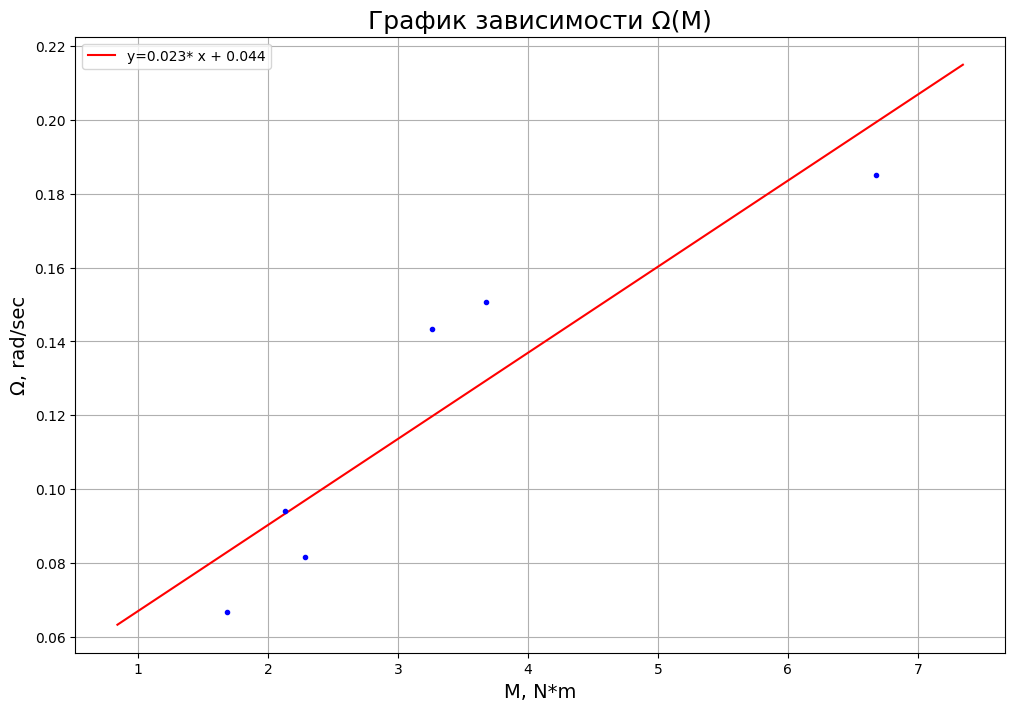

In [7]:
omega_np = np.array(grouped_data.omega)
momentum_np = np.array(grouped_data.momentum)

coefs = np.polyfit(momentum_np, omega_np, 1)

x_lsq = np.linspace(momentum_np.min() * 0.5, momentum_np.max() * 1.1, 100)

y_lsq = np.polyval(coefs, x_lsq)

fig = plt.figure(figsize=(12, 8))

coefs=np.round(coefs,3)
plt.plot(x_lsq, y_lsq, 'r-', label = "y="+str(coefs[0])+"* x + "+str(coefs[1]))
plt.plot(momentum_np, omega_np,'b.')
plt.grid(True)
plt.xlabel('M, N*m', {'fontsize': 14})
plt.ylabel('Ω, rad/sec', {'fontsize': 14})
plt.title('График зависимости Ω(M)', {'fontsize': 18})
plt.legend()
plt.show()
plt.show()

`np.polyfit` также умеет оценивать погрешности! Если точнее, он возвращает матрицу ковариаций для метода наименьших квадратов. Не будем углубляться в математику, главное знать, что на диагонали у неё стоят дисперсии полученных коэффициентов. Для получения собственно погрешности $\sigma$ необходимо взять корень из этих дисперсий.

Также стоит упомянуть про параметр `W`, задающий веса точек для оценки. Если известны ошибки $y_{error}$, можно задать веса как $W = 1 / y_{error}$, и прямая получится ещё более точной. Чтобы учесть ещё и ошибки по $x$, нужны, к сожалению, уже другие методы (но скорее всего, вам не понадобятся даже ошибки по $y$).

Представим, что произошла неприятность, и погрешности возросли в 10 раз!

In [8]:
grouped_data['sigma_down'] *= 10
grouped_data['sigma_momentum'] *= 10



Теперь вам нужно нарисовать график зависимости $\Omega_{down} (M_{down})$ <b>(не $\Omega(M)$!)</b> для точек с крестами погрешностей, а также построить не только прямую по оценке наименьших квадратов, а ещё и учесть погрешности оценок коэффициентов! Т.е. нужно построить три прямых: $k \cdot x + b$, которую выдал МНК, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, $(k + \sigma_k) \cdot x + (b + \sigma_b)$, и закрасить промежуток между этими прямыми (в этом вам поможет функция plt.fill_between). Остальное оформление оставьте таким же, как в предыдущем задании.

_Примечание: часто в МНК не смотрят на погрешность $b$, оставляя только $\sigma_k$._

<center><img src='https://drive.google.com/uc?export=view&id=1SriaMzJah7F610ocIK_O1-HqqtMQgxlg' width=600>

Пример получившегося графика</center>

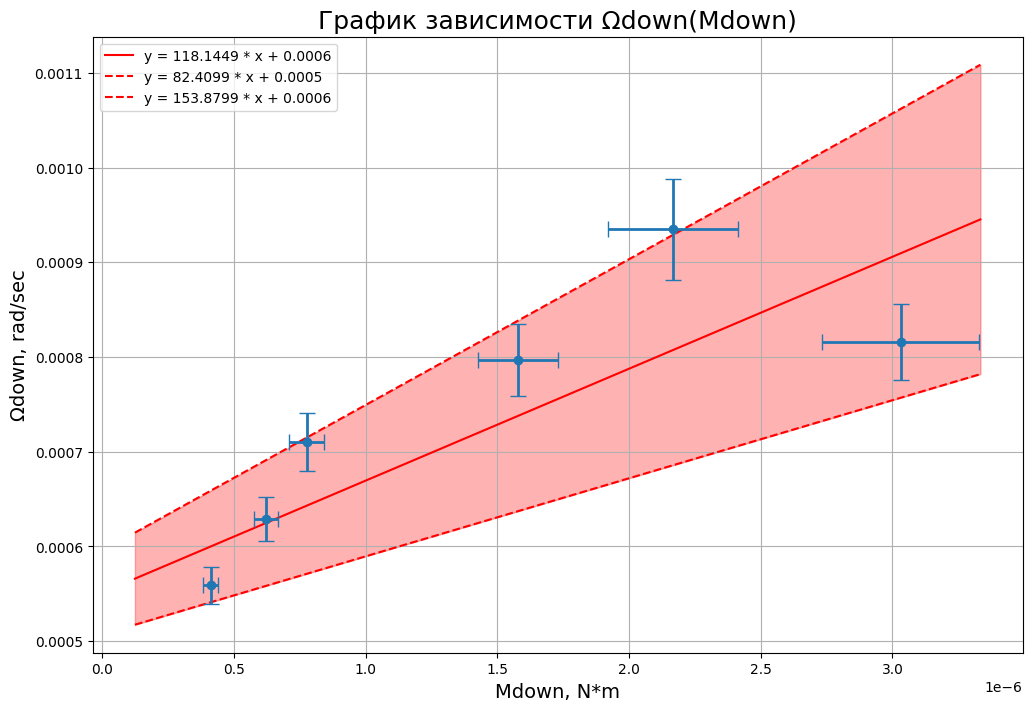

In [20]:
import numpy as np
import matplotlib.pyplot as plt

omega_down_np = np.array(grouped_data.omega_down)
momentum_down_np = np.array(grouped_data.momentum_down)

coefs, cov = np.polyfit(momentum_down_np, omega_down_np, 1, w=1/np.array(grouped_data.sigma_down), cov=True)

sigma_k = np.sqrt(cov[0][0])
sigma_b = np.sqrt(cov[1][1])

x_lsq = np.linspace(momentum_down_np.min() * 0.3, momentum_down_np.max() * 1.1, 100)
y_lsq = np.polyval(coefs, x_lsq)

y_lsq_lower = np.polyval([coefs[0] - sigma_k, coefs[1] - sigma_b], x_lsq)
y_lsq_upper = np.polyval([coefs[0] + sigma_k, coefs[1] + sigma_b], x_lsq)

fig = plt.figure(figsize=(12, 8))

plt.plot(x_lsq, y_lsq, label=f"y = {coefs[0]:.4f} * x + {coefs[1]:.4f}", color='red')

plt.plot(x_lsq, y_lsq_lower, linestyle='--', color='red', label=f"y = {(coefs[0] - sigma_k):.4f} * x + {(coefs[1] - sigma_b):.4f}")
plt.plot(x_lsq, y_lsq_upper, linestyle='--', color='red', label=f"y = {(coefs[0] + sigma_k):.4f} * x + {(coefs[1] + sigma_b):.4f}")

plt.fill_between(x_lsq, y_lsq_lower, y_lsq_upper, color='red', alpha=0.3)

plt.errorbar(momentum_down_np, omega_down_np, xerr=grouped_data.sigma_momentum, yerr=grouped_data.sigma_down, fmt='o', linewidth=2, capsize=6)

plt.grid(True)
plt.xlabel('Mdown, N*m', fontsize=14)
plt.ylabel('Ωdown, rad/sec', fontsize=14)
plt.title('График зависимости Ωdown(Mdown)', fontsize=18)
plt.legend()
plt.show()



# 3. Работа с датасетом (3 балла)

Датасет ирисов использовался в статье Р.А. Фишера 1936 года «Использование множественных измерений в таксономических задачах», а в наши дни часто используется начинающими аналитиками данных.

В наборе данных включены три вида ирисов по 50 образцов каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы линейно друг от друга.

Столбцы в этом датасете:

Идентификатор (Id) \\
Длина чашелистика, см (SepalLengthCm) \\
Ширина чашелистика, см (SepalWidthCm) \\
Длина лепестка, см (PetalLengthCm) \\
Ширина лепестка, см (PetalWidthCm) \\
Вид (Species) \\

<font color='red'>ВНИМАНИЕ!</font> Все графики в этой части должны быть подписаны, а на осях должны быть подписи на русском языке.

In [ ]:
sns.set_style("darkgrid")

In [35]:
import os
os.system("curl https://huggingface.co/datasets/scikit-learn/iris/raw/main/Iris.csv -o iris.csv")
iris = pd.read_csv('./iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
iris.drop(iris.columns[0], axis=1, inplace=True)
iris.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


Давайте проверим, сколько у нас разных видов ирисов в итоге - должно быть 3 по 50 штук каждый. Воспользуйтесь `value_counts` , чтобы посмотреть, какие есть возможные значения у колонки species.

In [40]:
species_counts = iris['Species'].value_counts()
species_counts

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


## 3.1 Графики длины и ширины лепестка ириса

Давайте попробуем сравнить, связаны ли ширина и длина лепестков - воспользуйтесь `sns.scatterplot`, чтобы отобразить на оси OXY значения. Не забудьте подписать график и оси!

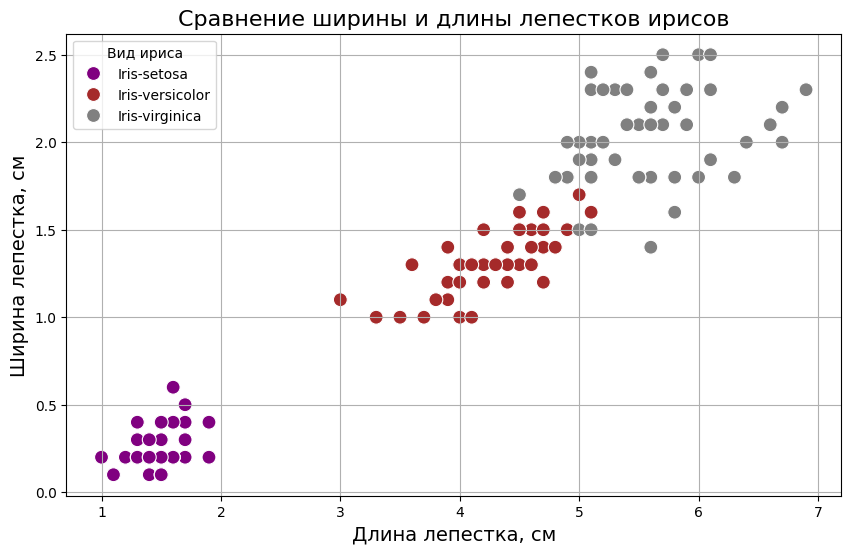

In [81]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data = iris, x='PetalLengthCm', y='PetalWidthCm', hue='Species', style='Species', s = 100,
                palette={'Iris-setosa': 'purple', 'Iris-versicolor': 'brown', 'Iris-virginica': 'gray'},markers = ["o","o","o"])

plt.title('Сравнение ширины и длины лепестков ирисов', fontsize=16)
plt.xlabel('Длина лепестка, см', fontsize=14)
plt.ylabel('Ширина лепестка, см', fontsize=14)
plt.legend(title='Вид ириса')
plt.grid(True)
plt.show()


## Напишите, какие выводы можно сделать из графика. Чего графику не хватает, чтобы он был информативным?

# <font color='white'>Длина и Ширина лепстков связаны прямопропорционально</font>

Давайте попробуем другие графики для тех же целей из библиотеки seaborn - `sns.jointplot`; кроме того, попробуйте выделить цветом точки на графике в зависимости от вида ириса - воспользуйтесь `sns.facetgrid`. В следующих ячейках выведите эти два графика и проанализируйте.

<Figure size 1000x600 with 0 Axes>

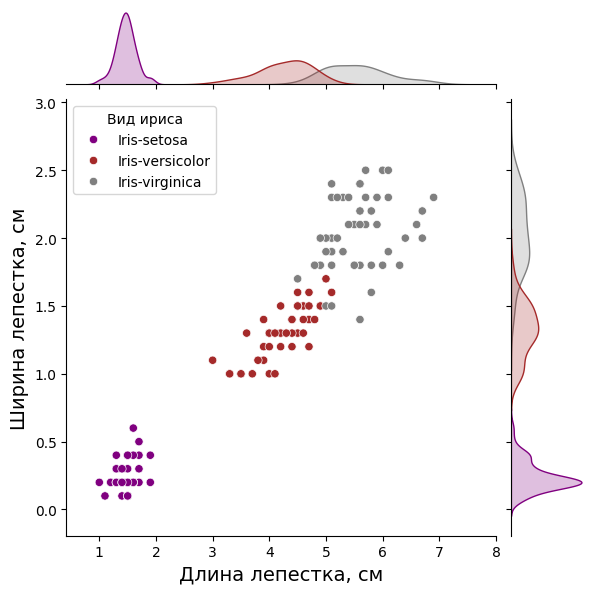

In [82]:
plt.figure(figsize=(10, 6))
joint_plot = sns.jointplot(data = iris, x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species',
                           palette={'Iris-setosa': 'purple', 'Iris-versicolor': 'brown', 'Iris-virginica': 'gray'} ,markers = ["o","o","o"])
plt.xlabel('Длина лепестка, см', fontsize=14)
plt.ylabel('Ширина лепестка, см', fontsize=14)
plt.legend(title='Вид ириса')
plt.show()

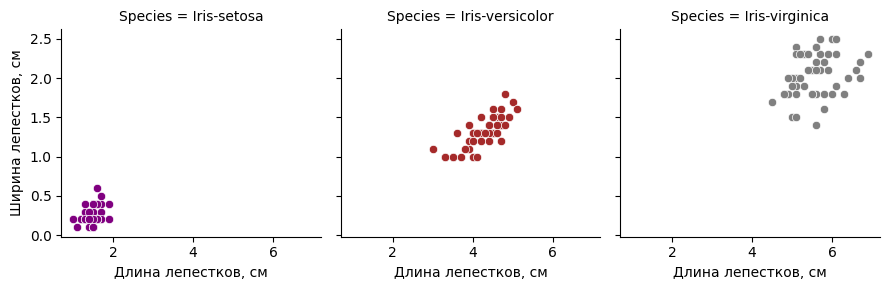

In [74]:
g3 = sns.FacetGrid(
    data=iris,

    col="Species",
    hue="Species", palette = {'Iris-setosa': 'purple', 'Iris-versicolor': 'brown', 'Iris-virginica': 'gray'}
)
g3.map(sns.scatterplot, "PetalLengthCm", "PetalWidthCm")
a=g3.set_axis_labels('Длина лепестков, см', 'Ширина лепестков, см')

Какие выводы можно сделать из этих графиков? Какой из 3 методов - scatterplot, jointplot, facetgrid вам кажется лучше?

#<font color='white'> Метод joinplot более информативный и все точки изображены на одном графике, что позволяет сравнивать обработанные значения между собой </font>

## 3.2 Графики распределений значений длины лепестка

Постройте график "ящика с усами" - `sns.boxplot` и его аналог - `sns.violinplot`. По оси Ox должны находиться возможные виды ирисов, по оси Oy.

<ipython-input-85-c0cbe6baf646>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y='PetalWidthCm', data = iris, palette = {'Iris-setosa': 'purple', 'Iris-versicolor': 'brown', 'Iris-virginica': 'gray'})


Text(0, 0.5, 'Ширина лепестка (см)')

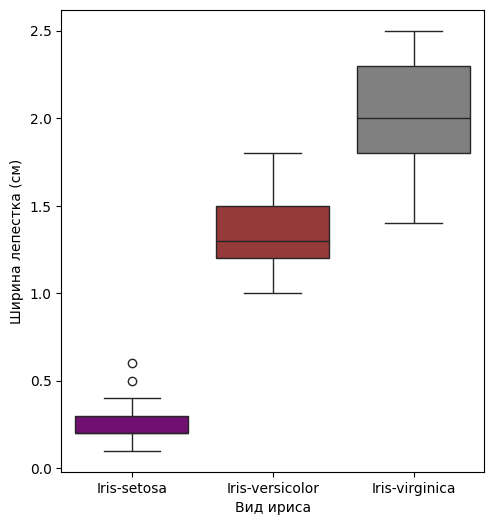

In [85]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Species', y='PetalWidthCm', data = iris,
            palette = {'Iris-setosa': 'purple', 'Iris-versicolor': 'brown', 'Iris-virginica': 'gray'})
plt.xlabel('Вид ириса')
plt.ylabel('Ширина лепестка (см)')

<ipython-input-86-bafdb8a2152d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'Species', y = 'PetalWidthCm', data = iris,


Text(0, 0.5, 'Ширина лепестка (см)')

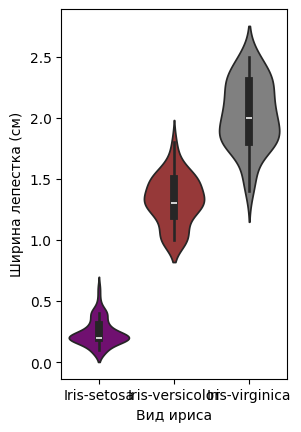

In [86]:
plt.subplot(1, 2, 2)
sns.violinplot(x = 'Species', y = 'PetalWidthCm', data = iris,
               palette = {'Iris-setosa': 'purple', 'Iris-versicolor': 'brown', 'Iris-virginica': 'gray'})
plt.xlabel('Вид ириса')
plt.ylabel('Ширина лепестка (см)')

Сравните два вида графиков. Какой более информативный, а какой - более красивый визуально по вашему мнению? Какую информацию мы можем получить из этих графиков?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

## 3.3 Попарные графики взаимосвязи признаков


Давайте попробуем построить большую табличку из графиковв размера 4 на 4, где у нас находятся все возможные пары признаков (длина/ширина лепестка, длина/ширина чашелистика). Для этого воспользуйтесь `sns.pairplot` и не забудьте указать параметр `hue`.

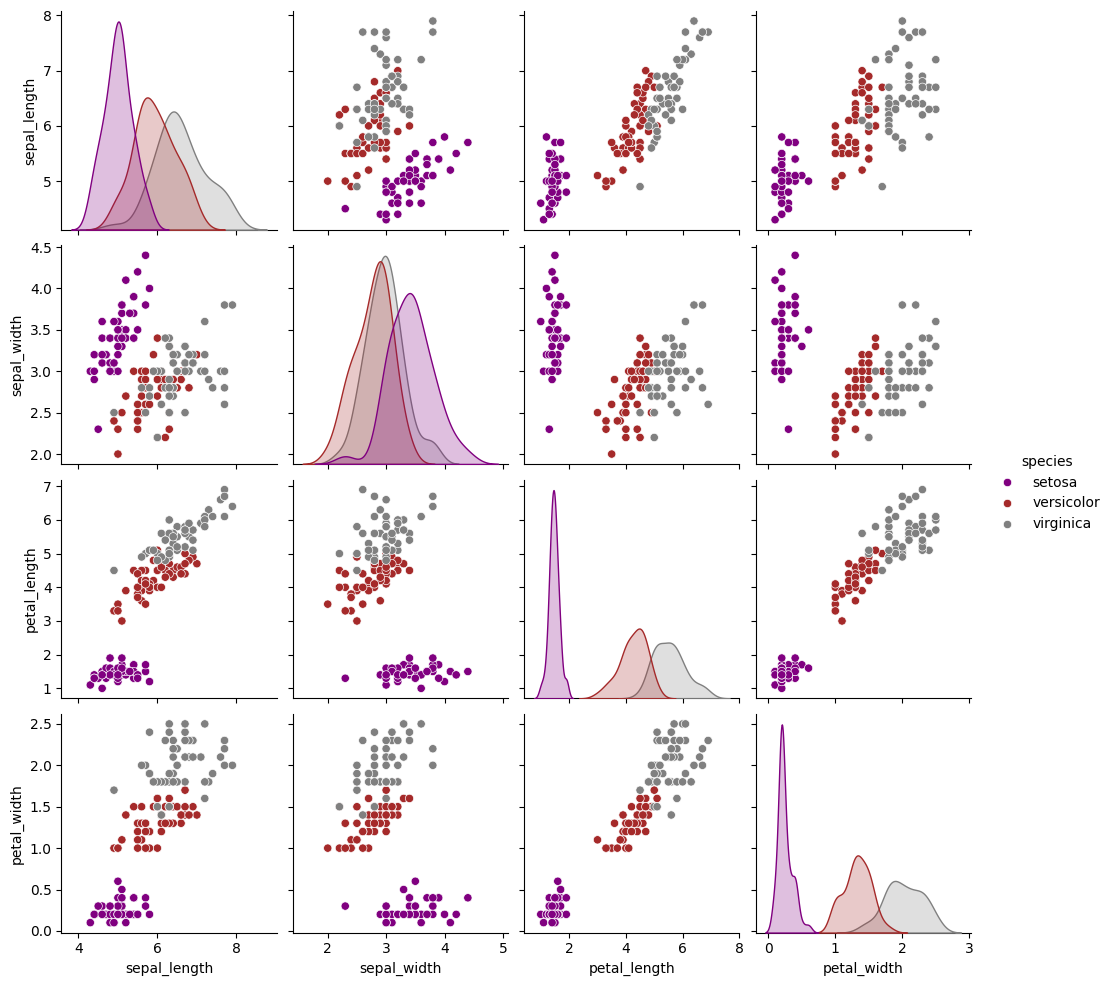

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')
custom_palette = {
    'setosa': 'purple',
    'versicolor': 'brown',
    'virginica': 'gray'
}

sns.pairplot(iris, hue='species', diag_kind='kde', palette=custom_palette)

plt.show()


Какую информацию о взаимосвязи признаков вы можете почерпнуть из полученного графика?

#<font color='white'> Все параметры зависят друг от друга</font>

Какие графики находятся на диагонали этой таблицы?

#<font color='white'> Распределение разных параметров </font>

Попробуй заменить графики на диагонали таблицы на другие, возможно, более информативные (подсказка: в документации у `sns.pairplot` для этого есть специальный параметр). Выведи полученный график.

In [ ]:
# TODO

Какие графики теперь находятся на диагонали таблицы? Получилось ли более информативно?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>